In [2]:
import pandas_datareader as pdr

In [3]:
import yfinance as yf
import pandas as pd
from IPython.display import display, HTML


def get_specific_stock_data(ticker_symbol):
    # Get data on this ticker
    ticker_data = yf.Ticker(ticker_symbol)

    # Get historical prices for this ticker
    stock_data_reversed = ticker_data.history(period='1d', start='2018-6-1', end='2024-6-1')

    # Sort the data in reverse order (newest first)
    stock_data = stock_data_reversed.iloc[::-1]

    # Include the date in the DataFrame
    stock_data.reset_index(inplace=True)

    # Extract additional date features
    stock_data['DayOfYear'] = stock_data['Date'].dt.dayofyear
    stock_data['Month'] = stock_data['Date'].dt.month
    stock_data['DayOfWeek'] = stock_data['Date'].dt.dayofweek
    stock_data["DayChange"] = stock_data["Open"] - stock_data["Close"]
    # Assuming stock_data is your DataFrame
    stock_data["DayChangeIndicator"] = stock_data["DayChange"].apply(lambda x: 1 if x > 0 else 0)


    num_rows = stock_data_reversed.shape[0]

    #print(f"The DataFrame has {num_stocks} stocks.")
    # Print the historical data
    #print(historical_data_reversed.head())

    return stock_data, num_rows

In [4]:
stock_data, num_rows = get_specific_stock_data("AAPL")
stock_data

<ipython-input-3-722141575906>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['DayOfYear'] = stock_data['Date'].dt.dayofyear
<ipython-input-3-722141575906>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Month'] = stock_data['Date'].dt.month
<ipython-input-3-722141575906>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,DayOfYear,Month,DayOfWeek,DayChange,DayChangeIndicator
0,2024-05-31 00:00:00-04:00,191.008524,192.135982,189.481974,191.816696,75158300,0.0,0.0,152,5,4,-0.808172,0
1,2024-05-30 00:00:00-04:00,190.330052,191.746850,190.200355,190.858856,49947900,0.0,0.0,151,5,3,-0.528804,0
2,2024-05-29 00:00:00-04:00,189.182654,191.816704,189.082874,189.861115,53068000,0.0,0.0,150,5,2,-0.678460,0
3,2024-05-28 00:00:00-04:00,191.078361,192.565009,188.673805,189.561798,52280100,0.0,0.0,149,5,1,1.516563,1
4,2024-05-24 00:00:00-04:00,188.394430,190.150457,187.616174,189.551804,36294600,0.0,0.0,145,5,4,-1.157374,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,2018-06-07 00:00:00-04:00,46.034684,46.048911,45.607866,45.873444,85388800,0.0,0.0,158,6,3,0.161241,1
1506,2018-06-06 00:00:00-04:00,45.913756,46.020460,45.508277,45.996746,83734400,0.0,0.0,157,6,2,-0.082990,0
1507,2018-06-05 00:00:00-04:00,45.780961,45.987255,45.612603,45.837868,86264000,0.0,0.0,156,6,1,-0.056907,0
1508,2018-06-04 00:00:00-04:00,45.441873,45.863949,45.373110,45.486927,105064800,0.0,0.0,155,6,0,-0.045054,0


In [5]:
df = stock_data.copy()
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,DayOfYear,Month,DayOfWeek,DayChange,DayChangeIndicator
0,2024-05-31 00:00:00-04:00,191.008524,192.135982,189.481974,191.816696,75158300,0.0,0.0,152,5,4,-0.808172,0
1,2024-05-30 00:00:00-04:00,190.330052,191.746850,190.200355,190.858856,49947900,0.0,0.0,151,5,3,-0.528804,0
2,2024-05-29 00:00:00-04:00,189.182654,191.816704,189.082874,189.861115,53068000,0.0,0.0,150,5,2,-0.678460,0
3,2024-05-28 00:00:00-04:00,191.078361,192.565009,188.673805,189.561798,52280100,0.0,0.0,149,5,1,1.516563,1
4,2024-05-24 00:00:00-04:00,188.394430,190.150457,187.616174,189.551804,36294600,0.0,0.0,145,5,4,-1.157374,0


In [6]:
df1 = df.reset_index()["Close"]
df1.head()

,Close
0,191.816696
1,190.858856
2,189.861115
3,189.561798
4,189.551804


In [7]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [8]:
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [9]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [10]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [11]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [13]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 0.2621 - val_loss: 0.0089
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0201 - val_loss: 0.0327
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0069 - val_loss: 0.0237
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0049 - val_loss: 0.0159
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0040 - val_loss: 0.0127
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0031 - val_loss: 0.0097
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0025 - val_loss: 0.0064
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0024 - val_loss: 0.0041
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0022 - val_loss: 0.0029
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

In [16]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [17]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [18]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

153.21488324587114

In [19]:
math.sqrt(mean_squared_error(y_test, test_predict))

55.20623272587733

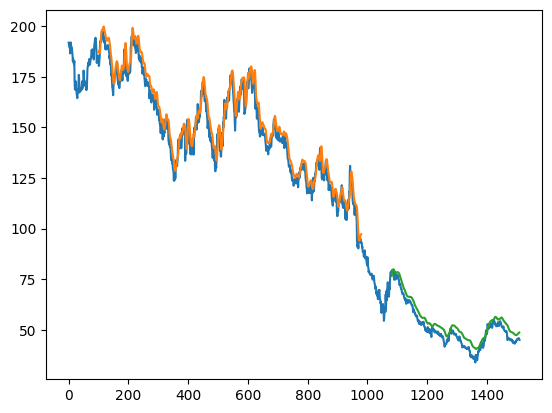

In [20]:
import matplotlib.pyplot as plt

look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [21]:
len(test_data)

529

In [22]:
x_input = test_data[len(test_data)-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [23]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [24]:
from numpy import array

lst_output=[]
n_steps=100
i=0

while(i<30):
    if(len(temp_input)>100):
      x_input=np.array(temp_input[1:])
      print("{} day input {}".format(i,x_input))
      x_input=x_input.reshape(1,-1)
      x_input = x_input.reshape((1, n_steps, 1))

      Yhat = model.predict(x_input, verbose=0)
      print("{} day output {}".format(i,Yhat))
      temp_input.extend(Yhat[0].tolist())
      temp_input=temp_input[1:]
      lst_output.extend(Yhat.tolist())
      i=i+1
    else:
      x_input = x_input.reshape((1, n_steps,1))
      Yhat = model.predict(x_input, verbose=0)
      print(Yhat[0])
      temp_input.extend(Yhat[0].tolist())
      print(len(temp_input))
      lst_output.extend(Yhat.tolist())
      i=i+1

print(lst_output)

[0.0915686]
101
1 day input [0.11172664 0.10692949 0.11446797 0.11586774 0.10888331 0.11580937
 0.10464022 0.10742524 0.12275007 0.11822989 0.11898812 0.12438313
 0.13033226 0.1262641  0.1233187  0.12110235 0.11995043 0.11334519
 0.11592609 0.11388468 0.10932085 0.11277651 0.11035609 0.11016654
 0.10964154 0.1183319  0.12207928 0.114293   0.11834651 0.11029777
 0.1146283  0.11725298 0.12275007 0.12492262 0.12385821 0.12006714
 0.11707794 0.11229537 0.10972906 0.10713358 0.10615669 0.1055151
 0.10550049 0.10611298 0.10920412 0.1029926  0.09850157 0.09778716
 0.09650389 0.09455005 0.09545414 0.09308571 0.09288229 0.09573014
 0.09416091 0.09328907 0.08473079 0.06844246 0.06789028 0.06944497
 0.07413832 0.0750246  0.07238005 0.07036038 0.07011339 0.07075279
 0.06860223 0.07012798 0.06934324 0.06995353 0.06951764 0.06494071
 0.06852968 0.06886378 0.0650714  0.06133708 0.0591866  0.06392357
 0.06091579 0.06148241 0.05953534 0.0599277  0.05664381 0.06063972
 0.06142428 0.06293546 0.06175852 0

In [25]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [26]:
df3 = df1.tolist()
df3.extend(lst_output)

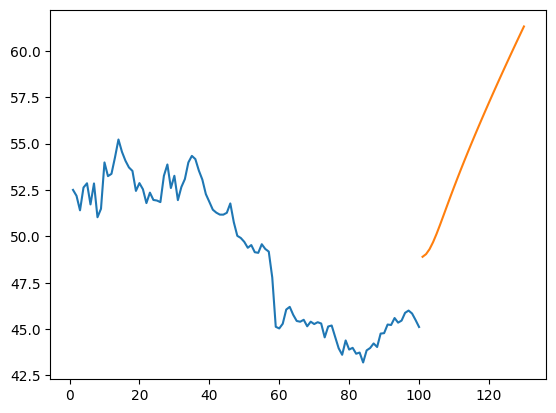

In [27]:
plt.plot(day_new, scaler.inverse_transform(df1[len(df1)-100:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

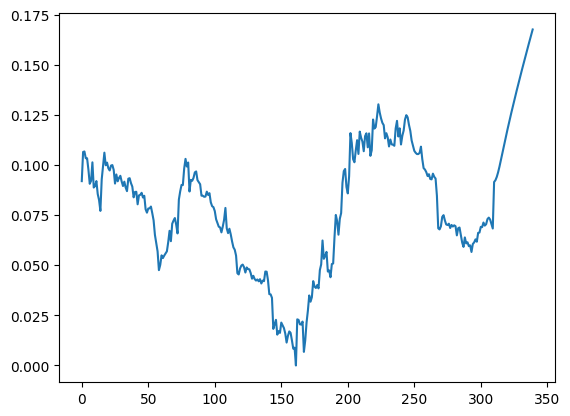

In [28]:
plt.plot(df3[1200:])